In [1]:
println("HGA使ってみましょう！")

HGA使ってみましょう！


In [3]:
log(ℯ)

1

In [4]:
log2(8)

3.0

## 以下ではオイラー公式を定義してみましょう！
exp(i*x) = cos(x) + i*sin(x)
なお、θやexpは、`\theta`や`\euler`と入力し「Tabキー」押下すれば出てきます

In [5]:
f(θ) = cos(θ) + im*sin(θ)

f (generic function with 1 method)

In [8]:
# θ=\pi
f(π)

-1.0 + 1.2246467991473532e-16im

In [11]:
real(f(π))

-1.0

## グラフのプロットを行ってみましょう！
### 必要パッケージの導入
1. notebook serverの停止
2. ターミナル上で`julia`と入力しREPL立上
3. `]`と入力しパッケージマネージメント用の画面へ
4. `add Plots`と入力（以下画像参考）<br>
![addingPlots](./hoge.png)
5. ついでに`add PyPlot`も（いい感じのグラフが描けます）
6. `Ctrl + d`でREPLから抜ける
7. `jupyter lab`でnotebookサーバの再立上

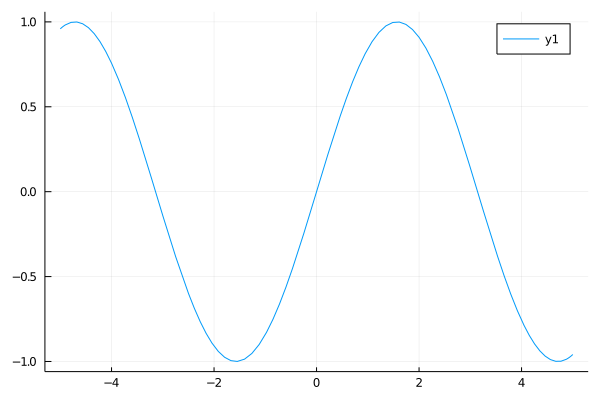

In [8]:
using Plots
gr()
plot(sin)  # 初回の表示がかなり長いので気長に待ちましょう（一度packageをコンパイルしてしまえば後は早いです）

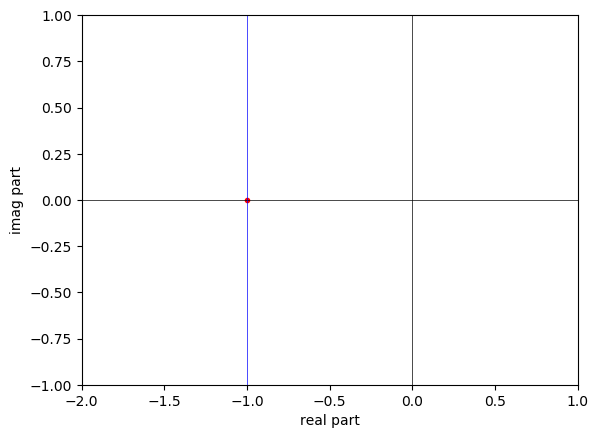

PyObject <matplotlib.lines.Line2D object at 0x7f3d43045f50>

In [13]:
using PyPlot
f(θ) = cos(θ) + im*sin(θ)
z = f(π)  # いわゆるオイラーの公式

plt.plot( real(z), imag(z), "r.")
plt.xlabel("real part")
plt.ylabel("imag part")
plt.xlim(-2,1)
plt.ylim(-1,1)
plt.axhline(0, lw=0.5, color="k")
plt.axvline(0, lw=0.5, color="k")
plt.axvline(-1, lw=0.5, color="b")

## 二変数関数のプロットをしてみましょう！
f(x1, x2) = x1^2 + x2^2 + 1
をプロットしてみます。また、`Optim`というパッケージを導入してこのfを最小とするようなx1, x2を見つけます（最適化問題）

In [18]:
using Plots
gr()
f(x1, x2) = x1^2 + x2^2 + 1

x1 = -5:0.1:5  # 初期値0から0.1刻みで10まで
x2 = -5:0.1:5

z = [f(i, j) for i in x1, j in x2]'
# 注意：「'」は配列を転置することを表します。
# 数学好きな人は怒るかもしれませんが、Juliaでは二次元配列においてy→xという形でアクセスします。
# 二次元配列[x1, x2]のアクセス成分(y, x)を(x,y)の形に変換するために、要素を転置させるようにします。
# なお、今回のケースは[x1, x2]は対象行列なので、転置しなくてもokです

plot(x1, x2, z, st=:wireframe)

In [14]:
using Optim
# ベクタx = [x[1], x[2]]から成る関数の最小値を求めましょう
# 式自体は先ほどの式（以下に再掲）をベクタ（配列）で表現したものです
# f(x1, x2) = x1^2 + x2^2 + 1
f(x) = x[1]^2 + x[2]^2 + 1

x0 = [3.0, 3.0] #初期値を[x[1], x[2]] = [3.0,3.0]とします。この初期値決定は最適化問題の中でも難しい問題の一つですね

opt = optimize(f, x0)
x_solved = Optim.minimizer(opt) #関数fを最⼩化するベクタxを求めます
println("x_solved = $x_solved")

fmin = Optim.minimum(opt) #関数fの最⼩値を求めます
println("fmin = $fmin")

x_solved = [-5.867709549877426e-5, -2.513060695146613e-5]
fmin = 1.000000004074549
